# Assignement 1

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

### 2.1 Linear Regression with Scikit-learn on Linnerud dataset

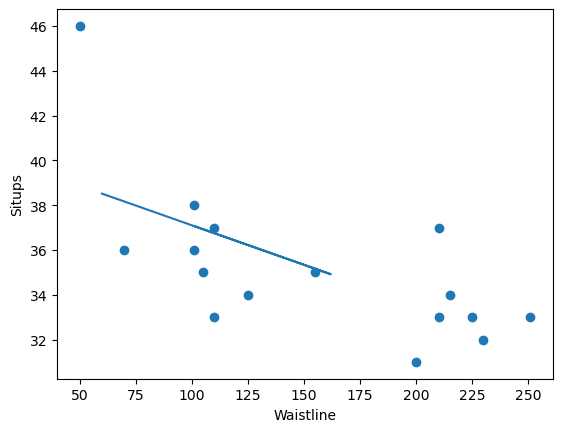

Mean-squared error is:  2.520233832986164


In [311]:
# import linnerude dataset
df = sklearn.datasets.load_linnerud()

# Waistline and situps acomplished
waistline = df.data[:,1]
situps = df.target[:,1]


#Reshape the data
waistline = waistline.reshape(-1,1)
situps = situps.reshape(-1,1)

# create a regression model
model = LinearRegression()

# Splits the data into training and testing sets
waist_train, waist_test, situps_train, situps_test = sklearn.model_selection.train_test_split(waistline,situps,test_size=0.2)

# Fit the model
model.fit(waist_train,situps_train)

# Predict the model
situps_predict = model.predict(waist_test)

#Plot the relationship between waistline and situps
plt.scatter(waist_train,situps_train)
plt.plot(waist_test,situps_predict)
plt.xlabel('Waistline')
plt.ylabel('Situps')
plt.show()

#  Mean-squared error is
print('Mean-squared error is: ',sklearn.metrics.mean_squared_error(situps_test,situps_predict))



In [312]:
# Import the pumpkin dataset
pumpkins = pd.read_csv('US-pumpkins copy.csv')

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package','High Price','Low Price']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)


new_pumpkins.info


<bound method DataFrame.info of       City Name  Package  Variety  Low Price  High Price  Origin  Item Size  \
2             1        3        4         29          26       3          3   
3             1        3        4         29          26      17          3   
4             1        3        4         16          14       5          2   
5             1        3        4         16          14       5          2   
6             1        4        4         29          28       5          3   
...         ...      ...      ...        ...         ...     ...        ...   
1694         12        3        5         27          23       4          6   
1695         12        3        5         27          23       4          6   
1696         12        3        5         27          23       4          6   
1697         12        3        5         27          23       4          6   
1698         12        3        5         27          23       4          6   

      Color  
2    

confusion_matrix is:  [[170   4]
 [ 24   1]]


c:\Users\atlen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\atlen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

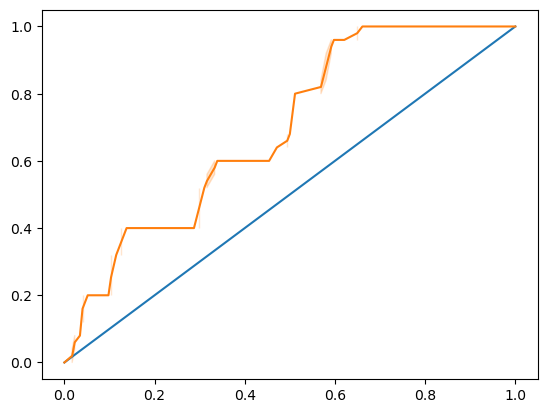

In [327]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

Selected_features = ['Origin','Item Size','Variety','Package','Low Price', 'City Name', 'High Price']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)

# Create the model
model = sklearn.linear_model.LogisticRegression()

# Fit the model
model.fit(X_train,y_train)
prediction = model.predict(X_test)

# Confusion matrix
print('confusion_matrix is: ',confusion_matrix(y_test,prediction))


y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)


### 2.3 Digit Classification with Artificial Neural Networks